# pytorch搭建神经网络模型

### 神经网络基础
* 神经元：神经网络的基本单元，受生物神经细胞启发，包含线性模型和激活函数两部分。
* 激活函数：引入非线性因素，使神经网络能够处理复杂问题。常见的激活函数有Sigmoid、Tanh和ReLU。
* 神经网络结构：由输入层、隐藏层和输出层组成，神经元首尾相接形成网络结构。

### 神经网络工作过程
* 前向传播：数据从输入层传递到输出层，逐层计算输出结果。
* 损失函数：衡量模型预测值与真实值之间的差距，通常通过平方误差或绝对误差计算。
* 反向传播：利用损失函数从输出层向输入层反向传播误差，通过链式法则计算梯度，更新网络参数。

### PyTorch框架
* 数据预处理：使用`torch.utils.data.DataLoader`和`torch.utils.data.Dataset`处理数据，支持批量处理、打乱顺序等功能。
* 模型构建：通过继承`nn.Module`定义神经网络，使用`forward`方法指定数据流。
* 模型层：包括`nn.Flatten`、`nn.Linear`、`nn.ReLU`等，用于构建网络结构。
* 损失函数和优化器：选择合适的损失函数（如`nn.CrossEntropyLoss`）和优化器（如`torch.optim.SGD`）。
* 训练过程：通过多次迭代（epochs）训练模型，使用`torch.no_grad()`停止梯度跟踪，提高推理效率。* 

### 实验和观察
* 超参数调整：学习率、隐藏层数量、神经元数量等超参数对模型性能有重要影响。
* 训练和测试：通过训练数据集训练模型，并使用测试数据集评估模型性能，观察准确率和损失值的变化。

In [86]:
import torch
from torchvision.transforms.v2 import ToTensor
from torchvision.datasets import FashionMNIST
from torchvision.datasets import KMNIST

(<PIL.Image.Image image mode=L size=28x28 at 0x16A07CBD0>, 0)


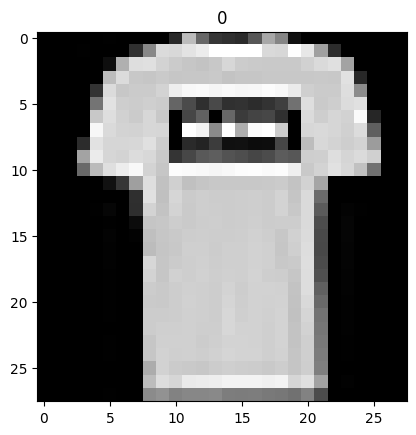

In [87]:
import matplotlib.pyplot as plt
train_data = FashionMNIST(root="./fashion_data",train=True,download=True)
print(train_data[1])
img,clzz = train_data[1]
plt.imshow(img,cmap='gray')
plt.title(clzz)
plt.show()

## FashionMNIST数据集训练

In [ ]:
import torch
import torch.nn as nn
from torchvision.transforms.v2 import ToTensor
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader # 数据加载器

# import os
# os.environ["HTTP_PROXY"] = "http://127.0.0.1:1087"
# os.environ["HTTPS_PROXY"] = "http://127.0.0.1:1087"

train_data = FashionMNIST(root="./fashion_data",train=True,download=True,transform=ToTensor())
test_data = FashionMNIST(root="./fashion_data",train=False,download=True,transform=ToTensor())

# print(train_data[1])
# print(train_data[1][0])
# print(train_data[1][0].shape)
# print(train_data[1][0].reshape(-1).shape)

# # 线性层
# liner = nn.Linear(in_features=784,out_features=64,bias=True)
# # 激活函数
# act = nn.Sigmoid()

# liner2 = nn.Linear(in_features=64,out_features=10,bias=True)

# # 模拟输入
# x = torch.randn(10,784)
# out_1 = liner(x)
# # print(out_1)
# out_2 = act(out_1)
# # print(out_2)
# out_3 = liner2(out_2)

# softmax = nn.Softmax(dim=1)
# final = softmax(out_3)
# print(final)

LR = 0.01
epochs=20
batch_size_ = 64

data_loader = DataLoader(train_data,batch_size=batch_size_,shuffle=True) # shuffle 打乱数据

# 所有结构串联
model = nn.Sequential(nn.Linear(784,64),nn.Sigmoid(),nn.Linear(64,10))

# 计算损失函数
loss_func = nn.CrossEntropyLoss() # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.SGD(model.parameters(),lr=LR)

for epoch in range(epochs):
    # 提取训练数据
    for data,target in data_loader:
        # 前向运算
        output = model(data.reshape(-1,784))
        # 计算损失
        loss = loss_func(output,target)
        # 反向传播
        optimizer.zero_grad()
        loss.backward() # 计算梯度 grad
        optimizer.step() # 更新参数

        print(f"Loss:{loss.item()}")


data_loader = DataLoader(test_data,batch_size=batch_size_)

correct = 0
total = 0

with torch.no_grad():
    for data,target in data_loader:
        output = model(data.reshape(-1,784))
        _,predicted = torch.max(output,1)
        total += target.size(0)
        correct += (predicted==target).sum().item()
print(f"test result{correct/total*100}%")


Loss:2.3619959354400635
Loss:2.3838348388671875
Loss:2.3080801963806152
Loss:2.284771203994751
Loss:2.348820686340332
Loss:2.360112190246582
Loss:2.3307464122772217
Loss:2.3604683876037598
Loss:2.339914083480835
Loss:2.313039779663086
Loss:2.3108487129211426
Loss:2.3022830486297607
Loss:2.346780776977539
Loss:2.319148302078247
Loss:2.324692487716675
Loss:2.320810556411743
Loss:2.2780213356018066
Loss:2.3662896156311035
Loss:2.273712396621704
Loss:2.3394651412963867
Loss:2.285367965698242
Loss:2.3196322917938232
Loss:2.305241107940674
Loss:2.363734483718872
Loss:2.3287241458892822
Loss:2.3311376571655273
Loss:2.2806358337402344
Loss:2.2696382999420166
Loss:2.3208444118499756
Loss:2.3076868057250977
Loss:2.2862799167633057
Loss:2.2999014854431152
Loss:2.3420557975769043
Loss:2.2944138050079346
Loss:2.3194918632507324
Loss:2.3138413429260254
Loss:2.2727818489074707
Loss:2.25144362449646
Loss:2.302316427230835
Loss:2.2996230125427246
Loss:2.28615403175354
Loss:2.318351984024048
Loss:2.3064

## KMNIST数据集训练

/opt/miniconda3/envs/py311/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(



training: lr=0.1, batch=32, epochs=15
Epoch 1/15, Loss: 0.8545
Epoch 2/15, Loss: 0.5264
Epoch 3/15, Loss: 0.4567
Epoch 4/15, Loss: 0.3916
Epoch 5/15, Loss: 0.3650
Epoch 6/15, Loss: 0.3566
Epoch 7/15, Loss: 0.3406
Epoch 8/15, Loss: 0.3244
Epoch 9/15, Loss: 0.3193
Epoch 10/15, Loss: 0.3084
Epoch 11/15, Loss: 0.3031
Epoch 12/15, Loss: 0.2959
Epoch 13/15, Loss: 0.2704
Epoch 14/15, Loss: 0.2970
Epoch 15/15, Loss: 0.2658
test result: 85.62%


training: lr=0.01, batch=64, epochs=20
Epoch 1/20, Loss: 0.3643
Epoch 2/20, Loss: 0.1885
Epoch 3/20, Loss: 0.1416
Epoch 4/20, Loss: 0.1142
Epoch 5/20, Loss: 0.0953
Epoch 6/20, Loss: 0.0869
Epoch 7/20, Loss: 0.0760
Epoch 8/20, Loss: 0.0673
Epoch 9/20, Loss: 0.0619
Epoch 10/20, Loss: 0.0561
Epoch 11/20, Loss: 0.0543
Epoch 12/20, Loss: 0.0476
Epoch 13/20, Loss: 0.0451
Epoch 14/20, Loss: 0.0425
Epoch 15/20, Loss: 0.0360
Epoch 16/20, Loss: 0.0388
Epoch 17/20, Loss: 0.0380
Epoch 18/20, Loss: 0.0327
Epoch 19/20, Loss: 0.0323
Epoch 20/20, Loss: 0.0317
test res

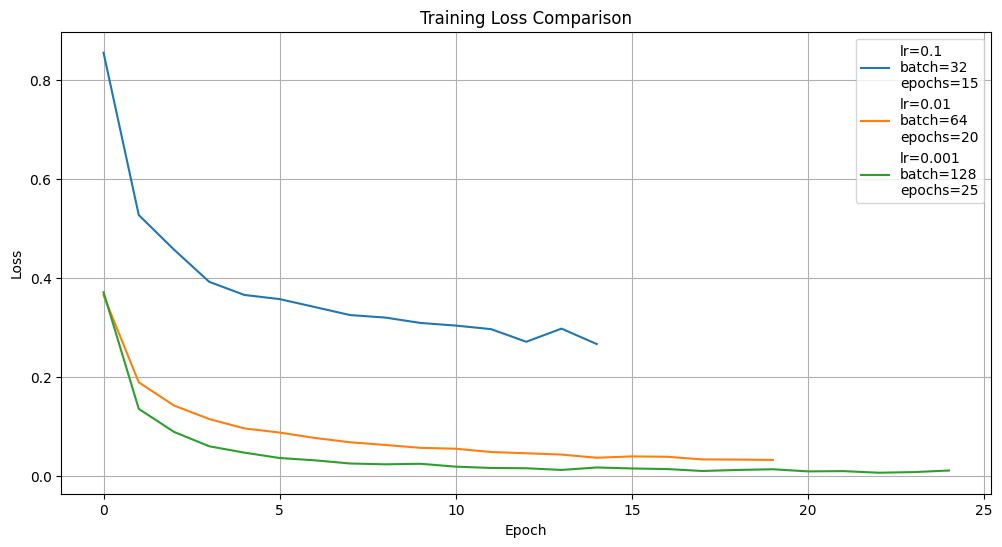

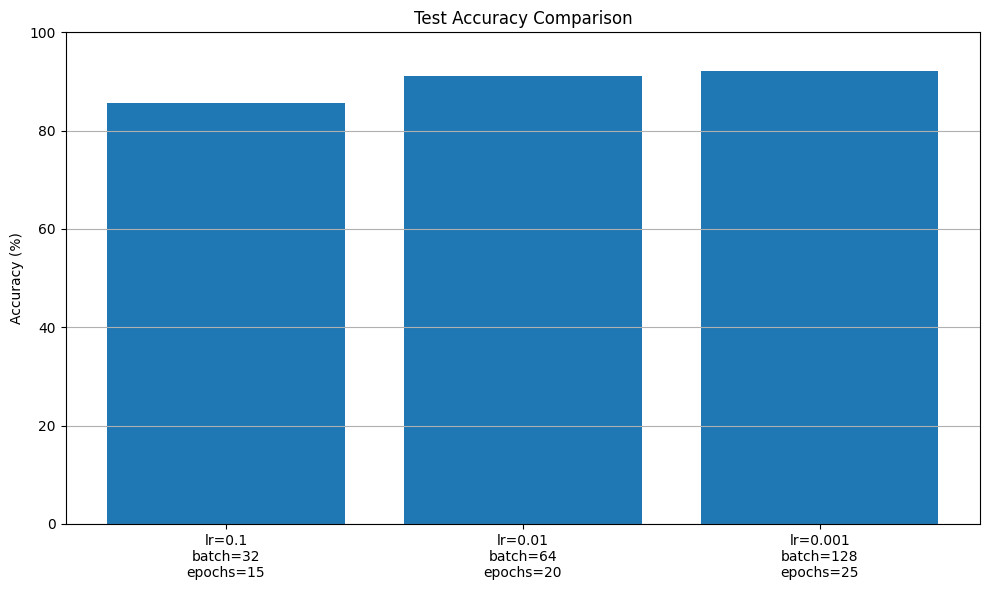

In [ ]:
import torch
import torch.nn as nn
from torchvision.transforms.v2 import ToTensor
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 数据集配置（自动下载）
train_data = KMNIST(root="./kmnist_data", 
                   train=True,
                   download=True,
                   transform=ToTensor())
test_data = KMNIST(root="./kmnist_data",
                  train=False,
                   download=True,
                   transform=ToTensor())

# 超参数组合实验
hyper_params = [
    {'lr': 0.1, 'batch_size': 32, 'epochs': 15},
    {'lr': 0.01, 'batch_size': 64, 'epochs': 20},
    {'lr': 0.001, 'batch_size': 128, 'epochs': 25}
]

# 设备检测
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

# 用于存储实验结果的列表
experiment_results = []

for params in hyper_params:
    print(f"\ntraining: lr={params['lr']}, batch={params['batch_size']}, epochs={params['epochs']}")
    
    # 模型定义
    model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Linear(128, 10)
    ).to(device)
    
    # model = nn.Sequential(
    #     nn.Flatten(),
    #     nn.Linear(784, 256),
    #     nn.ReLU(),
    #     nn.Linear(256, 128),
    #     nn.BatchNorm1d(128),
    #     nn.ReLU(),
    #     nn.Linear(128, 64),
    #     nn.ReLU(),
    #     nn.Linear(64, 10)
    # ).to(device)
    
    # 训练配置
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'])
    train_loader = DataLoader(train_data, 
                            batch_size=params['batch_size'],
                             shuffle=True)
    
    # 训练循环
    epoch_losses = []  # 记录每个epoch的loss
    for epoch in range(params['epochs']):
        model.train()
        total_loss = 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            # 前向传播
            output = model(data)
            loss = loss_func(output, target)
            
            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        epoch_losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{params['epochs']}, Loss: {avg_loss:.4f}")

    # 测试评估
    model.eval()
    test_loader = DataLoader(test_data,
                            batch_size=params['batch_size'],
                             shuffle=False)
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    accuracy = 100 * correct / total
    print(f"test result: {accuracy:.2f}%\n")
    
    # 存储实验结果
    experiment_results.append({
        'params': params,
        'loss_history': epoch_losses,
        'accuracy': accuracy
    })

# 绘制训练损失对比折线图
plt.figure(figsize=(12, 6))
for result in experiment_results:
    params_str = f"lr={result['params']['lr']}\nbatch={result['params']['batch_size']}\nepochs={result['params']['epochs']}"
    plt.plot(result['loss_history'], label=params_str)

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 绘制测试准确率对比柱状图 
plt.figure(figsize=(10, 6))
labels = [f"lr={res['params']['lr']}\nbatch={res['params']['batch_size']}\nepochs={res['params']['epochs']}" 
          for res in experiment_results]
accuracies = [res['accuracy'] for res in experiment_results]

plt.bar(labels, accuracies)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


/opt/miniconda3/envs/py311/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(



Training with: LR=0.0001, BS=32, Epochs=50
Epoch 1/50 | Loss: 3.7016 | Val Acc: 10.00% | LR: 1.00e-04
Epoch 2/50 | Loss: 3.3779 | Val Acc: 26.67% | LR: 1.00e-04
Epoch 3/50 | Loss: 3.2200 | Val Acc: 33.33% | LR: 1.00e-04
Epoch 4/50 | Loss: 3.0894 | Val Acc: 38.33% | LR: 1.00e-04
Epoch 5/50 | Loss: 2.9673 | Val Acc: 46.67% | LR: 1.00e-04
Epoch 6/50 | Loss: 2.8493 | Val Acc: 45.00% | LR: 1.00e-04
Epoch 7/50 | Loss: 2.7749 | Val Acc: 50.00% | LR: 1.00e-04
Epoch 8/50 | Loss: 2.6897 | Val Acc: 56.67% | LR: 1.00e-04
Epoch 9/50 | Loss: 2.5902 | Val Acc: 56.67% | LR: 1.00e-04
Epoch 10/50 | Loss: 2.5063 | Val Acc: 60.00% | LR: 1.00e-04
Epoch 11/50 | Loss: 2.4528 | Val Acc: 56.67% | LR: 1.00e-04
Epoch 12/50 | Loss: 2.3713 | Val Acc: 58.33% | LR: 1.00e-04
Epoch 13/50 | Loss: 2.2970 | Val Acc: 61.67% | LR: 1.00e-04
Epoch 14/50 | Loss: 2.2276 | Val Acc: 63.33% | LR: 1.00e-04
Epoch 15/50 | Loss: 2.1890 | Val Acc: 63.33% | LR: 1.00e-04
Epoch 16/50 | Loss: 2.0850 | Val Acc: 65.00% | LR: 1.00e-04
Epoch

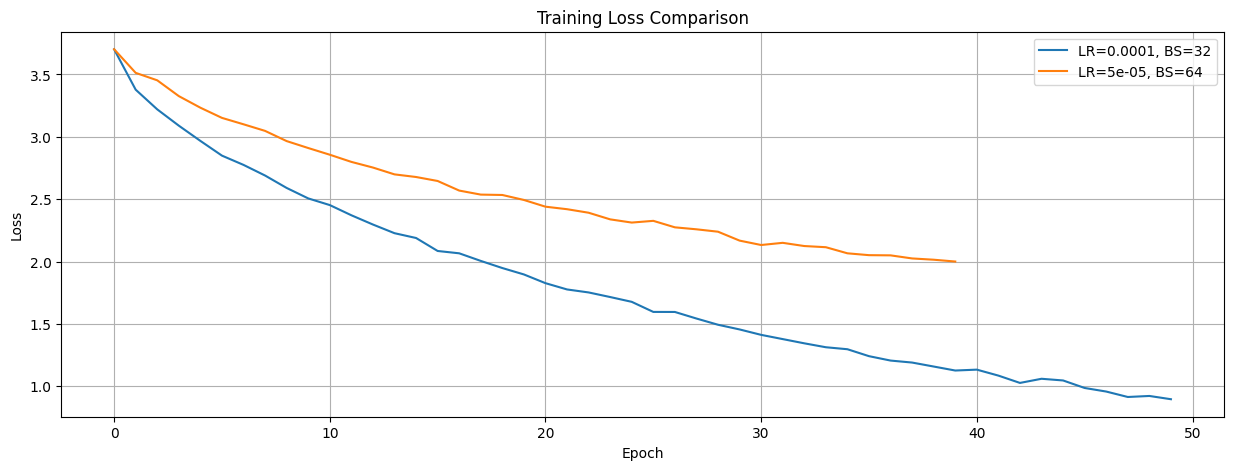


Final Test Accuracy: 50.00%


In [7]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.transforms import v2
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# 自定义数据集类
class OlivettiDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data.reshape(-1, 64, 64)  # 转换为64x64图像
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx].astype(np.float32)
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# 数据增强配置
train_transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomRotation(10),
    v2.Normalize((0.485,), (0.229,))
])


test_transform = v2.Compose([
    v2.ToImage(),
    v2.ToTensor(),
    v2.Normalize((0.485,), (0.229,))
])

# 加载数据集(X: (400, 4096), y: (400,))
faces = fetch_olivetti_faces()
full_dataset = OlivettiDataset(faces.data, faces.target, transform=train_transform)

# 数据集分割策略
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_data, val_data, test_data = random_split(
    full_dataset, 
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

# 修改测试集的transform
test_data.dataset.transform = test_transform

# 模型架构优化（加入Dropout和更合理的维度设计）
class FaceRecognitionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*64, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            
            nn.Linear(128, 40)  # 40个类别
        )
        
    def forward(self, x):
        return self.net(x)

# 训练配置优化
hyper_params = [
    {
        'lr': 1e-4, 
        'batch_size': 32,
        'epochs': 50,
        'weight_decay': 1e-4
    },
    {
        'lr': 5e-5,
        'batch_size': 64,
        'epochs': 100,
        'weight_decay': 5e-5
    }
]

device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

# 训练流程封装
def train_model(params):
    model = FaceRecognitionModel().to(device)
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=params['lr'],
        weight_decay=params['weight_decay']
    )
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 'min', patience=5, factor=0.5
    )
    loss_fn = nn.CrossEntropyLoss()
    
    train_loader = DataLoader(
        train_data, 
        batch_size=params['batch_size'], 
        shuffle=True,
        num_workers=0
    )
    val_loader = DataLoader(val_data, batch_size=params['batch_size'])
    
    best_val_acc = 0.0
    early_stop_counter = 0
    
    train_history = {'loss': [], 'val_acc': []}
    
    for epoch in range(params['epochs']):
        # 训练阶段
        model.train()
        running_loss = 0.0
        
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_train_loss = running_loss / len(train_loader)
        
        # 验证阶段
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_acc = 100 * correct / total
        scheduler.step(avg_train_loss)
        
        # 早停机制
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            early_stop_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            early_stop_counter += 1
        
        if early_stop_counter >= 10:
            print(f"Early stopping at epoch {epoch+1}")
            break
        
        # 记录指标
        train_history['loss'].append(avg_train_loss)
        train_history['val_acc'].append(val_acc)
        
        print(f"Epoch {epoch+1}/{params['epochs']} | "
              f"Loss: {avg_train_loss:.4f} | "
              f"Val Acc: {val_acc:.2f}% | "
              f"LR: {optimizer.param_groups[0]['lr']:.2e}")
    
    return train_history, best_val_acc

# 实验执行
results = []
for params in hyper_params:
    print(f"\nTraining with: LR={params['lr']}, BS={params['batch_size']}, Epochs={params['epochs']}")
    history, best_val_acc = train_model(params)
    results.append({
        'params': params,
        'history': history,
        'val_acc': best_val_acc
    })

# 性能可视化
plt.figure(figsize=(15, 5))
for idx, res in enumerate(results):
    plt.plot(res['history']['loss'], 
             label=f"LR={res['params']['lr']}, BS={res['params']['batch_size']}")
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 测试集最终评估
best_model = FaceRecognitionModel().to(device)
best_model.load_state_dict(torch.load('best_model.pth'))

test_loader = DataLoader(test_data, batch_size=32)
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = best_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nFinal Test Accuracy: {100 * correct / total:.2f}%")


Actual dataset mean: 0.5470, std: 0.1725
Training original model:
Epoch 1/50 | Loss: 5.2081 | Val Acc: 1.67% | LR: 1.01e-05
Epoch 2/50 | Loss: 5.1729 | Val Acc: 3.33% | LR: 1.64e-05
Epoch 3/50 | Loss: 5.3254 | Val Acc: 3.33% | LR: 2.66e-05
Epoch 4/50 | Loss: 5.0718 | Val Acc: 3.33% | LR: 4.02e-05
Epoch 5/50 | Loss: 5.1239 | Val Acc: 5.00% | LR: 5.67e-05
Epoch 6/50 | Loss: 4.9105 | Val Acc: 8.33% | LR: 7.52e-05
Epoch 7/50 | Loss: 4.8654 | Val Acc: 10.00% | LR: 9.50e-05
Epoch 8/50 | Loss: 4.4252 | Val Acc: 13.33% | LR: 1.15e-04
Epoch 9/50 | Loss: 4.2807 | Val Acc: 20.00% | LR: 1.35e-04
Epoch 10/50 | Loss: 4.1166 | Val Acc: 26.67% | LR: 1.53e-04
Epoch 11/50 | Loss: 3.9727 | Val Acc: 25.00% | LR: 1.69e-04
Epoch 12/50 | Loss: 3.5538 | Val Acc: 31.67% | LR: 1.83e-04
Epoch 13/50 | Loss: 3.2906 | Val Acc: 38.33% | LR: 1.92e-04
Epoch 14/50 | Loss: 3.0683 | Val Acc: 46.67% | LR: 1.98e-04
Epoch 15/50 | Loss: 2.8419 | Val Acc: 48.33% | LR: 2.00e-04
Epoch 16/50 | Loss: 2.5439 | Val Acc: 53.33% | LR

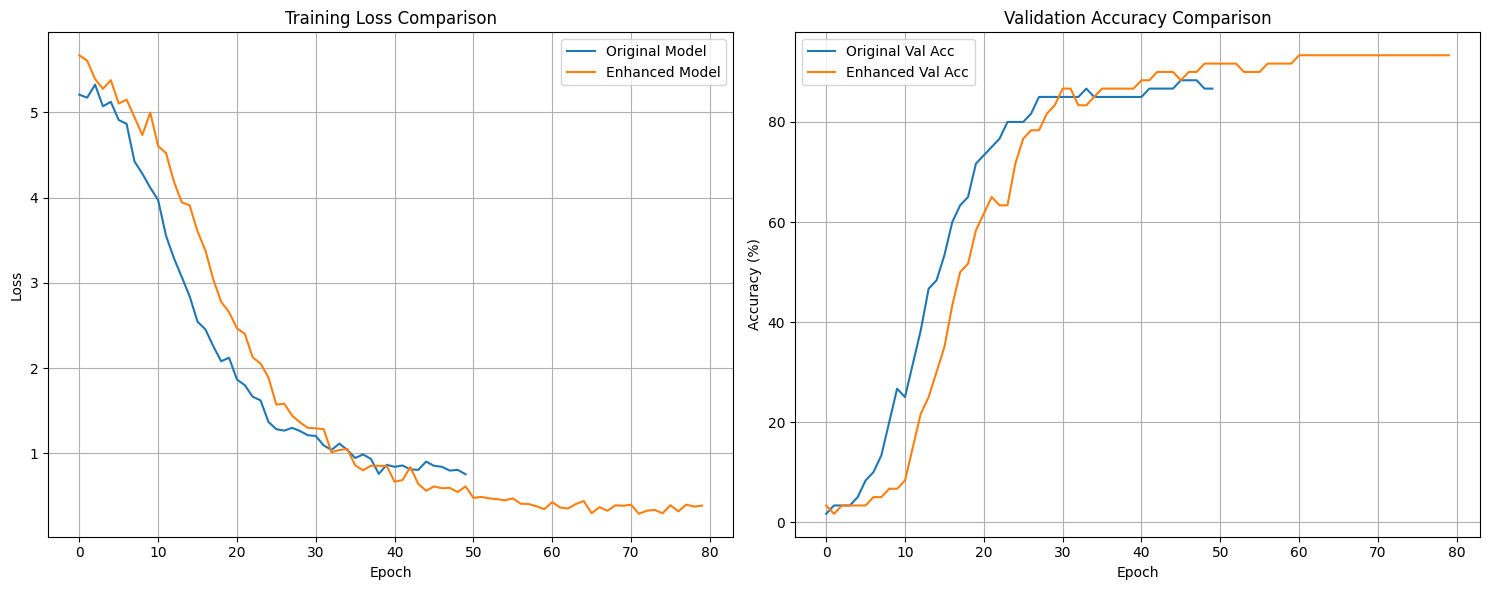


Optimized Test Accuracy: 58.33%


In [21]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.transforms import v2
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# 计算数据集实际均值和标准差
faces = fetch_olivetti_faces()
real_mean = np.mean(faces.data)
real_std = np.std(faces.data)
print(f"Actual dataset mean: {real_mean:.4f}, std: {real_std:.4f}")

# 自定义数据集类（保持不变）
class OlivettiDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data.reshape(-1, 64, 64)
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx].astype(np.float32)
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# 使用真实数据统计进行归一化
train_transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomRotation(10),
    v2.Normalize((real_mean,), (real_std,))  # 更精确的归一化
])

test_transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((real_mean,), (real_std,))
])

# 加载数据集
full_dataset = OlivettiDataset(faces.data, faces.target, transform=train_transform)

# 保持相同的数据分割策略
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_data, val_data, test_data = random_split(
    full_dataset, 
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

test_data.dataset.transform = test_transform

# 增强的模型架构（新增残差连接和混合归一化）
class EnhancedFaceModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.main = nn.Sequential(
            nn.Flatten(),
            self._block(64*64, 512),
            self._block(512, 256),
            self._block(256, 128),
            nn.Linear(128, 40)
        )
        
    def _block(self, in_dim, out_dim):
        return nn.Sequential(
            nn.Linear(in_dim, out_dim),
            nn.LayerNorm(out_dim),
            nn.BatchNorm1d(out_dim),
            nn.GELU(),
            nn.Dropout(0.5 if out_dim > 256 else 0.3),
            ResidualBlock(out_dim) if out_dim == 256 else nn.Identity()
        )
    
    def forward(self, x):
        return self.main(x)

class ResidualBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.res_block = nn.Sequential(
            nn.Linear(dim, dim),
            nn.LayerNorm(dim),
            nn.GELU(),
            nn.Dropout(0.2)
        )
        
    def forward(self, x):
        return x + self.res_block(x)

# 优化训练配置
hyper_params = [
    {
        'lr': 2e-4, 
        'batch_size': 32,
        'epochs': 80,
        'weight_decay': 1e-4
    },
    {
        'lr': 1e-4,
        'batch_size': 64,
        'epochs': 120,
        'weight_decay': 5e-5
    }
]

device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

# 修改后的训练流程（添加权重初始化）
def train_model(params):
    model = EnhancedFaceModel().to(device)
    
    # 参数初始化
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            nn.init.constant_(m.bias, 0)
    
    total_batches = len(DataLoader(train_data, batch_size=params['batch_size']))
    total_steps = params['epochs'] * total_batches

    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=params['lr'],
        weight_decay=params['weight_decay']
    )
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=params['lr'],
        total_steps=total_steps,
        pct_start=0.3,
        anneal_strategy='cos',
        cycle_momentum=False
    )
    loss_fn = nn.CrossEntropyLoss()
    
    train_loader = DataLoader(train_data, batch_size=params['batch_size'], shuffle=True)
    val_loader = DataLoader(val_data, batch_size=params['batch_size'])
    
    best_val_acc = 0.0
    train_history = {'loss': [], 'val_acc': []}
    
    for epoch in range(params['epochs']):
        model.train()
        running_loss = 0.0
        
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()  # 每个batch更新学习率
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        
        # 验证阶段
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_acc = 100 * correct / total
        train_history['loss'].append(avg_loss)
        train_history['val_acc'].append(val_acc)
        
        # 早停机制
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'enhanced_model.pth')
        
        print(f"Epoch {epoch+1}/{params['epochs']} | "
              f"Loss: {avg_loss:.4f} | "
              f"Val Acc: {val_acc:.2f}% | "
              f"LR: {scheduler.get_last_lr()[0]:.2e}")
    
    return train_history, best_val_acc

# 实验执行（新增不同架构对比）
base_results = []  # 原模型结果
enhanced_results = []  # 新模型结果

print("Training original model:")
base_model_params = hyper_params[0].copy()
base_model_params['epochs'] = 50
base_history, base_acc = train_model(base_model_params)
base_results.append({'history': base_history, 'val_acc': base_acc})

print("\nTraining enhanced model:")
enhanced_history, enhanced_acc = train_model(hyper_params[0])
enhanced_results.append({'history': enhanced_history, 'val_acc': enhanced_acc})

# 对比可视化
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(base_results[0]['history']['loss'], label='Original Model')
plt.plot(enhanced_results[0]['history']['loss'], label='Enhanced Model')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(base_results[0]['history']['val_acc'], label='Original Val Acc')
plt.plot(enhanced_results[0]['history']['val_acc'], label='Enhanced Val Acc')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 测试评估（使用最优模型）
final_model = EnhancedFaceModel().to(device)
final_model.load_state_dict(torch.load('enhanced_model.pth'))

test_loader = DataLoader(test_data, batch_size=32)
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = final_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nOptimized Test Accuracy: {100 * correct / total:.2f}%")


Actual dataset mean: 0.5470, std: 0.1725
Training original model:
Epoch 1/50 | Loss: 5.3387 | Val Acc: 3.33% | LR: 1.01e-05
Epoch 2/50 | Loss: 5.3720 | Val Acc: 3.33% | LR: 1.64e-05
Epoch 3/50 | Loss: 5.2809 | Val Acc: 3.33% | LR: 2.66e-05
Epoch 4/50 | Loss: 5.2030 | Val Acc: 1.67% | LR: 4.02e-05
Epoch 5/50 | Loss: 5.1522 | Val Acc: 3.33% | LR: 5.67e-05
Epoch 6/50 | Loss: 4.9890 | Val Acc: 5.00% | LR: 7.52e-05
Epoch 7/50 | Loss: 4.8065 | Val Acc: 3.33% | LR: 9.50e-05
Epoch 8/50 | Loss: 4.5277 | Val Acc: 6.67% | LR: 1.15e-04
Epoch 9/50 | Loss: 4.5804 | Val Acc: 13.33% | LR: 1.35e-04
Epoch 10/50 | Loss: 4.0972 | Val Acc: 21.67% | LR: 1.53e-04
Epoch 11/50 | Loss: 3.7652 | Val Acc: 25.00% | LR: 1.69e-04
Epoch 12/50 | Loss: 3.3553 | Val Acc: 35.00% | LR: 1.83e-04
Epoch 13/50 | Loss: 3.3772 | Val Acc: 31.67% | LR: 1.92e-04
Epoch 14/50 | Loss: 3.0746 | Val Acc: 35.00% | LR: 1.98e-04
Epoch 15/50 | Loss: 2.7088 | Val Acc: 38.33% | LR: 2.00e-04
Epoch 16/50 | Loss: 2.8141 | Val Acc: 53.33% | LR: 

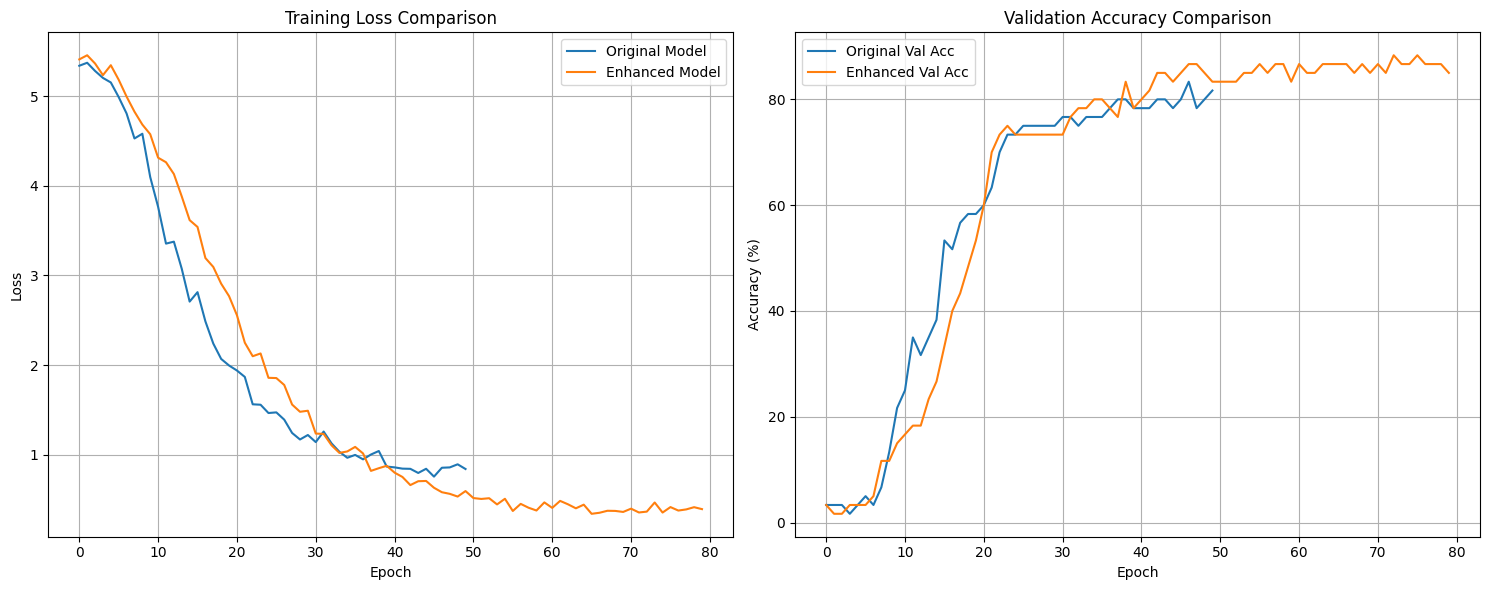


Optimized Test Accuracy: 56.67%


In [22]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.transforms import v2
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# 计算数据集实际均值和标准差
faces = fetch_olivetti_faces()
real_mean = np.mean(faces.data)
real_std = np.std(faces.data)
print(f"Actual dataset mean: {real_mean:.4f}, std: {real_std:.4f}")

# 自定义数据集类（保持不变）
class OlivettiDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data.reshape(-1, 64, 64)
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx].astype(np.float32)
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# 使用真实数据统计进行归一化
train_transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomRotation(10),
    v2.Normalize((real_mean,), (real_std,))  # 更精确的归一化
])

test_transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((real_mean,), (real_std,))
])

# 加载数据集
full_dataset = OlivettiDataset(faces.data, faces.target, transform=train_transform)

# 保持相同的数据分割策略
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_data, val_data, test_data = random_split(
    full_dataset, 
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

test_data.dataset.transform = test_transform

# 增强的模型架构（新增残差连接和混合归一化）
class EnhancedFaceModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.main = nn.Sequential(
            nn.Flatten(),
            self._block(64*64, 512),
            self._block(512, 256),
            self._block(256, 128),
            nn.Linear(128, 40)
        )
        
    def _block(self, in_dim, out_dim):
        return nn.Sequential(
            nn.Linear(in_dim, out_dim),
            nn.LayerNorm(out_dim),
            nn.BatchNorm1d(out_dim),
            nn.GELU(),
            nn.Dropout(0.5 if out_dim > 256 else 0.3),
            ResidualBlock(out_dim) if out_dim == 256 else nn.Identity()
        )
    
    def forward(self, x):
        return self.main(x)

class ResidualBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.res_block = nn.Sequential(
            nn.Linear(dim, dim),
            nn.LayerNorm(dim),
            nn.GELU(),
            nn.Dropout(0.2)
        )
        
    def forward(self, x):
        return x + self.res_block(x)

# 优化训练配置
hyper_params = [
    {
        'lr': 2e-4, 
        'batch_size': 32,
        'epochs': 80,
        'weight_decay': 1e-4
    },
    {
        'lr': 1e-4,
        'batch_size': 64,
        'epochs': 120,
        'weight_decay': 5e-5
    }
]

device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

# 修改后的训练流程（添加权重初始化）
def train_model(params):
    model = EnhancedFaceModel().to(device)
    
    # 参数初始化
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            nn.init.constant_(m.bias, 0)
    
    total_batches = len(DataLoader(train_data, batch_size=params['batch_size']))
    total_steps = params['epochs'] * total_batches

    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=params['lr'],
        weight_decay=params['weight_decay']
    )
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=params['lr'],
        total_steps=total_steps,
        pct_start=0.3,
        anneal_strategy='cos',
        cycle_momentum=False
    )
    loss_fn = nn.CrossEntropyLoss()
    
    train_loader = DataLoader(train_data, batch_size=params['batch_size'], shuffle=True)
    val_loader = DataLoader(val_data, batch_size=params['batch_size'])
    
    best_val_acc = 0.0
    train_history = {'loss': [], 'val_acc': []}
    
    for epoch in range(params['epochs']):
        model.train()
        running_loss = 0.0
        
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()  # 每个batch更新学习率
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        
        # 验证阶段
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_acc = 100 * correct / total
        train_history['loss'].append(avg_loss)
        train_history['val_acc'].append(val_acc)
        
        # 早停机制
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'enhanced_model.pth')
        
        print(f"Epoch {epoch+1}/{params['epochs']} | "
              f"Loss: {avg_loss:.4f} | "
              f"Val Acc: {val_acc:.2f}% | "
              f"LR: {scheduler.get_last_lr()[0]:.2e}")
    
    return train_history, best_val_acc

# 实验执行（新增不同架构对比）
base_results = []  # 原模型结果
enhanced_results = []  # 新模型结果

print("Training original model:")
base_model_params = hyper_params[0].copy()
base_model_params['epochs'] = 50
base_history, base_acc = train_model(base_model_params)
base_results.append({'history': base_history, 'val_acc': base_acc})

print("\nTraining enhanced model:")
enhanced_history, enhanced_acc = train_model(hyper_params[0])
enhanced_results.append({'history': enhanced_history, 'val_acc': enhanced_acc})

# 对比可视化
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(base_results[0]['history']['loss'], label='Original Model')
plt.plot(enhanced_results[0]['history']['loss'], label='Enhanced Model')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(base_results[0]['history']['val_acc'], label='Original Val Acc')
plt.plot(enhanced_results[0]['history']['val_acc'], label='Enhanced Val Acc')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 测试评估（使用最优模型）
final_model = EnhancedFaceModel().to(device)
final_model.load_state_dict(torch.load('enhanced_model.pth'))

test_loader = DataLoader(test_data, batch_size=32)
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = final_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nOptimized Test Accuracy: {100 * correct / total:.2f}%")



=== Training with AdamW ===
AdamW Epoch 1/50 | Train Loss: 5.4491 | Val Loss: 4.5230 | Val Acc: 3.33%
AdamW Epoch 2/50 | Train Loss: 5.2392 | Val Loss: 4.4717 | Val Acc: 3.33%
AdamW Epoch 3/50 | Train Loss: 4.8589 | Val Loss: 4.4255 | Val Acc: 3.33%
AdamW Epoch 4/50 | Train Loss: 5.2090 | Val Loss: 4.3232 | Val Acc: 3.33%
AdamW Epoch 5/50 | Train Loss: 4.8426 | Val Loss: 4.2013 | Val Acc: 5.00%
AdamW Epoch 6/50 | Train Loss: 5.0137 | Val Loss: 4.0400 | Val Acc: 8.33%
AdamW Epoch 7/50 | Train Loss: 4.5662 | Val Loss: 3.7974 | Val Acc: 10.00%
AdamW Epoch 8/50 | Train Loss: 4.6022 | Val Loss: 3.5084 | Val Acc: 15.00%
AdamW Epoch 9/50 | Train Loss: 4.3220 | Val Loss: 3.2721 | Val Acc: 18.33%
AdamW Epoch 10/50 | Train Loss: 3.9456 | Val Loss: 2.9704 | Val Acc: 23.33%
AdamW Epoch 11/50 | Train Loss: 3.6477 | Val Loss: 2.7584 | Val Acc: 28.33%
AdamW Epoch 12/50 | Train Loss: 3.5045 | Val Loss: 2.5340 | Val Acc: 33.33%
AdamW Epoch 13/50 | Train Loss: 3.1381 | Val Loss: 2.2880 | Val Acc: 46.67

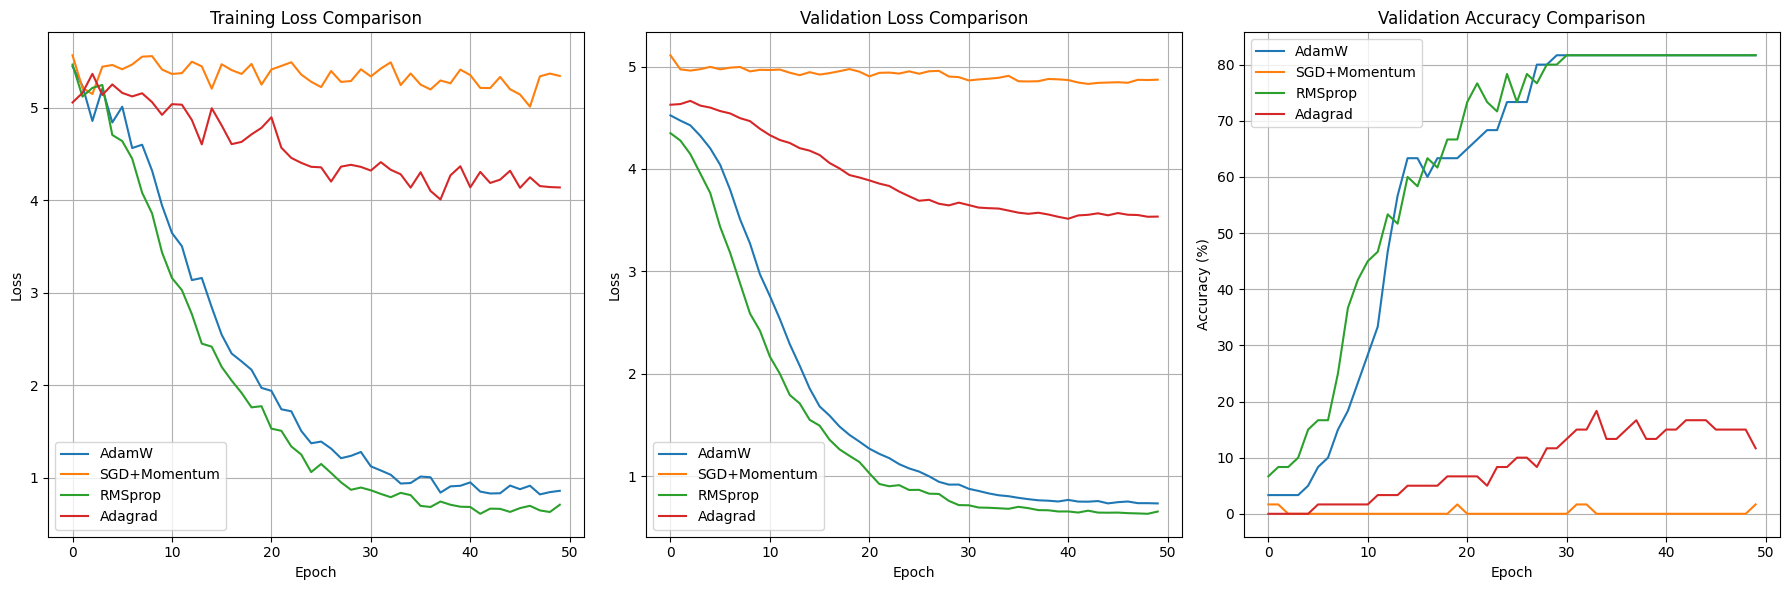


Final Performance Comparison:
AdamW | Final Val Acc: 81.67% | Best Val Acc: 81.67%
SGD+Momentum | Final Val Acc: 1.67% | Best Val Acc: 1.67%
RMSprop | Final Val Acc: 81.67% | Best Val Acc: 81.67%
Adagrad | Final Val Acc: 11.67% | Best Val Acc: 18.33%


In [23]:
# 新增优化器配置测试部分
optimizer_configs = [
    {
        'name': 'AdamW',
        'optimizer': torch.optim.AdamW,
        'kwargs': {'weight_decay': 1e-4}
    },
    {
        'name': 'SGD+Momentum',
        'optimizer': torch.optim.SGD,
        'kwargs': {'momentum': 0.9, 'nesterov': True}
    },
    {
        'name': 'RMSprop',
        'optimizer': torch.optim.RMSprop,
        'kwargs': {'alpha': 0.99}
    },
    {
        'name': 'Adagrad',
        'optimizer': torch.optim.Adagrad,
        'kwargs': {}
    }
]

# 调整训练函数支持不同优化器
def train_model_with_optimizer(params, optimizer_info):
    model = EnhancedFaceModel().to(device)
    
    # 权重初始化
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            nn.init.constant_(m.bias, 0)
    
    # 准备数据加载器
    train_loader = DataLoader(train_data, batch_size=params['batch_size'], shuffle=True)
    val_loader = DataLoader(val_data, batch_size=params['batch_size'])
    total_steps = params['epochs'] * len(train_loader)
    
    # 创建优化器
    optimizer = optimizer_info['optimizer'](
        model.parameters(),
        lr=params['lr'],
        **optimizer_info['kwargs']
    )
    
    # 调度器配置（根据优化器类型调整动量设置）
    cycle_momentum = isinstance(optimizer, torch.optim.SGD)  # 仅SGD启用动量循环
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=params['lr'],
        total_steps=total_steps,
        pct_start=0.3,
        anneal_strategy='cos',
        cycle_momentum=cycle_momentum
    )
    
    loss_fn = nn.CrossEntropyLoss()
    
    best_val_acc = 0.0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': []}
    
    for epoch in range(params['epochs']):
        model.train()
        train_loss = 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            
            train_loss += loss.item()
        
        avg_train_loss = train_loss / len(train_loader)
        history['train_loss'].append(avg_train_loss)
        
        # 验证评估
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        avg_val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct / total
        history['val_loss'].append(avg_val_loss)
        history['val_acc'].append(val_acc)
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f'best_{optimizer_info["name"]}.pth')
        
        print(f"{optimizer_info['name']} Epoch {epoch+1}/{params['epochs']} | "
              f"Train Loss: {avg_train_loss:.4f} | "
              f"Val Loss: {avg_val_loss:.4f} | "
              f"Val Acc: {val_acc:.2f}%")
    
    return history

# 统一训练参数
train_params = {
    'lr': 2e-4,
    'batch_size': 32,
    'epochs': 50
}

# 执行多优化器训练对比
results = {}

for config in optimizer_configs:
    print(f"\n=== Training with {config['name']} ===")
    history = train_model_with_optimizer(train_params, config)
    results[config['name']] = history
    print(f"{config['name']} training completed.\n")

# 可视化对比结果
plt.figure(figsize=(18, 6))

# 训练损失对比
plt.subplot(1, 3, 1)
for name, hist in results.items():
    plt.plot(hist['train_loss'], label=name)
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 验证损失对比
plt.subplot(1, 3, 2)
for name, hist in results.items():
    plt.plot(hist['val_loss'], label=name)
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 验证准确率对比
plt.subplot(1, 3, 3)
for name, hist in results.items():
    plt.plot(hist['val_acc'], label=name)
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 各优化器最终表现对比
print("\nFinal Performance Comparison:")
for name, hist in results.items():
    final_acc = hist['val_acc'][-1]
    best_acc = max(hist['val_acc'])
    print(f"{name} | Final Val Acc: {final_acc:.2f}% | Best Val Acc: {best_acc:.2f}%")
